Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math  
from sklearn import metrics
from time import time 
np.random.seed(42)

Creación del Dataset de pruebas

In [2]:
#Dimension de los datos a generar
#rango de los datos(- 10.0, 10.0))
dimensiones = 4
from sklearn.datasets import make_blobs
#creacion de dataset original 
n_muestras = 1000
Dataset, etiquetas_reales = make_blobs(n_samples=n_muestras, n_features=dimensiones)

In [3]:
Dataset

array([[ -2.18227025,   8.7951856 ,   5.46928442,  -0.23796563],
       [  3.69869326,   3.21594468, -10.74166062,  10.53551159],
       [ -7.25482357,  -7.19782469,  -7.55668396,   7.88121398],
       ...,
       [  3.12312163,   5.22282252,  -9.05630392,   9.7598581 ],
       [  1.13305941,   5.11675211,  -8.71226332,  10.87086772],
       [  1.165802  ,   4.25912193, -10.85280852,   7.60509059]])

Normalizacion con valores entre 0 y 1

In [4]:
maximo , minimo = Dataset.max(), Dataset.min()
X = (Dataset - minimo) / (maximo - minimo)

Metodo del codo

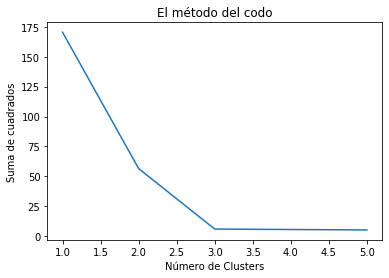

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 6), wcss)
plt.title('El método del codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de cuadrados')
plt.show()

Parámetros del K-means y kmedoides

In [6]:
param_kmeans_nro1=2
param_kmeans_nro2=3
param_kmeans_nro3=4
param_kmedoids_nro1=2
param_kmedoids_nro2=3
param_kmedoids_nro3=4

0.0677493332229898


<Figure size 360x360 with 0 Axes>

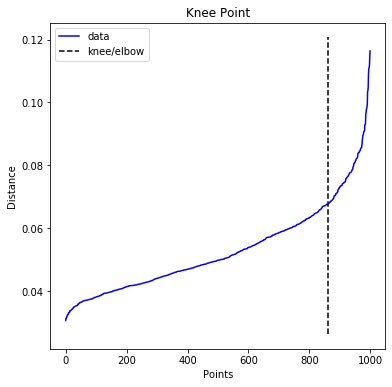

In [7]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances1 = distances[:,19]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances1, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances1[knee.knee])

0.07474480005688564


<Figure size 360x360 with 0 Axes>

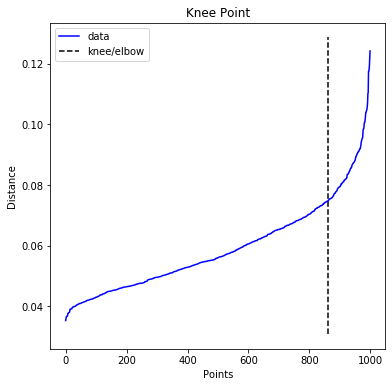

In [8]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=30)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances2 = distances[:,29]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances2, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances2[knee.knee])

0.08031098402439135


<Figure size 360x360 with 0 Axes>

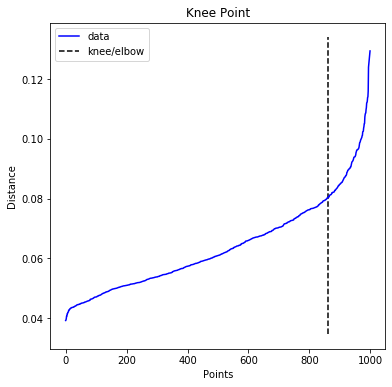

In [9]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=40)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)
distances3 = distances[:,39]
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances3, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances3[knee.knee])

Parámetros del DBSCAN y HDBSCAN

In [10]:
param_minpts_nro1=20
param_minpts_nro2=30
param_minpts_nro3=40
param_eps_nro1= float(format(distances1[knee.knee], '.5')) #Para que tome los primeros 4 digitos despues del punto
param_eps_nro2= float(format(distances2[knee.knee], '.5'))
param_eps_nro3= float(format(distances3[knee.knee], '.5'))

Declaración de variables para guardar los resultados

In [11]:
#INDICE DE RAN AJUSTADO 
#Para los resultados del algoritmo k-means evaluados por la metrica Indice de Rand Ajustado
RandkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
RandkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
RandkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica Indice de Rand Ajustado
RandkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica Indice de Rand Ajustado
RandDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
RandDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

#Información mutua ajustada 
#Para los resultados del algoritmo k-means evaluados por la metrica de Información mutua ajustada
IMkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
IMkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
IMkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica de Información mutua ajustada
IMkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica deInformación mutua ajustada
IMDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
IMDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

#Puntuaciones de Fowlkes-Mallows
#Para los resultados del algoritmo k-means evaluados por la metrica de Fowlkes-Mallows
FMkmeansclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
FMkmeansclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
FMkmeansclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado'])
#Para los resultados del algoritmo Kmedoides evaluados por la metrica de Fowlkes-Mallows
FMkmedoidclusteringK1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMkmedoidclusteringK2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMkmedoidclusteringK3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
#Para los resultados del algoritmo DBSCAN evaluados por la metrica de Fowlkes-Mallows
FMDbscanclustering1 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMDbscanclustering2 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 
FMDbscanclustering3 = pd.DataFrame(columns=['Evaluacion','Iteracion','PorcRuido','Resultado']) 

In [12]:
'''Esta seccion del codigo es para suprimir las advertencias futuras, es de unas actualizaciones que tendra la libreria, 
para evitar confuciones en la ejecucion'''
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Evaluación de Datos

In [13]:
evaluacion = 1 
nf=1
while evaluacion < 26:  
    #Aplicación del algoritmo K-means con tres parametros diferentes
    from sklearn.cluster import KMeans
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro1) #1era aplicacion
    etiquetas_KmeansSinRuidoK1 = KmeansSinRuido.fit(X).labels_  
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro2) #2da aplicacion
    etiquetas_KmeansSinRuidoK2 = KmeansSinRuido.fit(X).labels_  
    KmeansSinRuido = KMeans(n_clusters=param_kmeans_nro3) #3ra aplicacion
    etiquetas_KmeansSinRuidoK3 = KmeansSinRuido.fit(X).labels_  
    #Aplicación del algoritmo K-medoids
    from sklearn_extra.cluster import KMedoids    
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro1).fit(X) #1era aplicacion
    etiquetas_KmedoidSinRuidoK1 = etiquetas_KmedoidSinRuidoK.labels_
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro2).fit(X) #2da aplicacion
    etiquetas_KmedoidSinRuidoK2 = etiquetas_KmedoidSinRuidoK.labels_
    etiquetas_KmedoidSinRuidoK = KMedoids(n_clusters=param_kmedoids_nro3).fit(X) #3ra aplicacion
    etiquetas_KmedoidSinRuidoK3 = etiquetas_KmedoidSinRuidoK.labels_ 
    #Aplicacion del algoritmo DBSCAN
    from sklearn.cluster import DBSCAN
    dbscanSinRuido1 = DBSCAN(eps=param_eps_nro1, min_samples=param_minpts_nro1) #1era aplicacion
    etiquetas_dbscanSinRuido1 = dbscanSinRuido1.fit(X).labels_
    dbscanSinRuido2 = DBSCAN(eps=param_eps_nro2, min_samples=param_minpts_nro2) #2da aplicacion
    etiquetas_dbscanSinRuido2 = dbscanSinRuido2.fit(X).labels_
    dbscanSinRuido3 = DBSCAN(eps=param_eps_nro3, min_samples=param_minpts_nro3) #3ra aplicacion
    etiquetas_dbscanSinRuido3 = dbscanSinRuido3.fit(X).labels_
    print("*****Inicio de la Evaluacion numero : " + str(evaluacion) +"*****")
    print("+++++++++++++++++++")
    #Contenido Principal
    #Evaluacion con Resultado
    Iteracion=1
    while Iteracion < 11:
        print("*****Inicio de la Iteración numero : " + str(Iteracion) +" *****")
        porcRuido=10
        NroMuestraConRuido=n_muestras + int((n_muestras*porcRuido)/100)
        cant_aleatoria=int((n_muestras*porcRuido)/100)
        while porcRuido < 110:
            #Generacion de puntos de ruido de forma aleatoria
            ruido=np.random.rand(cant_aleatoria,dimensiones) 
            # formula= Final - inicio * np.random.random(filas,columnas) + inicio (-10,10) 
            #ruido= 20 * np.random.random((cant_aleatoria,dimensiones)) - 10
            #Se agrega los puntos del ruido al X original
            XRuido=np.concatenate((X,ruido), axis=0)         
            #Aplicacion de algoritmos  variados con sus parametros al conjunto ruidoso      
            #K-means
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro1)
            KmeansRuidoK1 = estimador_kmediasR.fit(XRuido).labels_
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro2)
            KmeansRuidoK2 = estimador_kmediasR.fit(XRuido).labels_
            estimador_kmediasR = KMeans(n_clusters=param_kmeans_nro3)
            KmeansRuidoK3 = estimador_kmediasR.fit(XRuido).labels_
            #Kmedoides
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro1, random_state=0).fit(XRuido)
            KmedoidsRuidoK1=KmedoidsRuidoK.labels_
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro2, random_state=0).fit(XRuido)
            KmedoidsRuidoK2=KmedoidsRuidoK.labels_
            KmedoidsRuidoK= KMedoids(n_clusters=param_kmedoids_nro3, random_state=0).fit(XRuido)
            KmedoidsRuidoK3=KmedoidsRuidoK.labels_
            #DBSCAN
            estimador_DbscanR = DBSCAN(eps=param_eps_nro1, min_samples=param_minpts_nro1)
            DbscanRuido1 = estimador_DbscanR.fit(XRuido).labels_
            estimador_DbscanR = DBSCAN(eps=param_eps_nro2, min_samples=param_minpts_nro2)
            DbscanRuido2 = estimador_DbscanR.fit(XRuido).labels_
            estimador_DbscanR = DBSCAN(eps=param_eps_nro3, min_samples=param_minpts_nro3)
            DbscanRuido3 = estimador_DbscanR.fit(XRuido).labels_
            #Luego aplicar al conjunto ruidoso, aqui le quito los datos generados aleatoriamente
            KmeansRuidosoK1=KmeansRuidoK1[:n_muestras]
            KmeansRuidosoK2=KmeansRuidoK2[:n_muestras]
            KmeansRuidosoK3=KmeansRuidoK3[:n_muestras]
            KmedoidRuidosoK1=KmedoidsRuidoK1[:n_muestras]
            KmedoidRuidosoK2=KmedoidsRuidoK2[:n_muestras]
            KmedoidRuidosoK3=KmedoidsRuidoK3[:n_muestras]
            DbscanRuidoso1=DbscanRuido1[:n_muestras]
            DbscanRuidoso2=DbscanRuido2[:n_muestras]
            DbscanRuidoso3=DbscanRuido3[:n_muestras]
            #evaluaciond de los algoritmos utilizando las metricas 
            #Evaluacion Indice de Rand Ajustado
            RANDKmeansK1=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            RANDKmeansK2=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            RANDKmeansK3=metrics.adjusted_rand_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            RANDKmedoidK1=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK1,KmedoidRuidosoK1) 
            RANDKmedoidK2=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK2,KmedoidRuidosoK2) 
            RANDKmedoidK3=metrics.adjusted_rand_score(etiquetas_KmedoidSinRuidoK3,KmedoidRuidosoK3) 
            RANDDbscan1=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido1,DbscanRuidoso1) 
            RANDDbscan2=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido2,DbscanRuidoso2) 
            RANDDbscan3=metrics.adjusted_rand_score(etiquetas_dbscanSinRuido3,DbscanRuidoso3) 
            #Evaluacion  de Fowlkes-Mallows
            FMKmeansK1=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            FMKmeansK2=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            FMKmeansK3=metrics.fowlkes_mallows_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            FMKmedoidK1=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK1,KmedoidRuidosoK1)
            FMKmedoidK2=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK2,KmedoidRuidosoK2)
            FMKmedoidK3=metrics.fowlkes_mallows_score(etiquetas_KmedoidSinRuidoK3,KmedoidRuidosoK3)
            FMDbscan1=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido1,DbscanRuidoso1)
            FMDbscan2=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido2,DbscanRuidoso2)
            FMDbscan3=metrics.fowlkes_mallows_score(etiquetas_dbscanSinRuido3,DbscanRuidoso3)
            #Información mutua ajustada 
            IMKmeansK1=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK1, KmeansRuidosoK1)
            IMKmeansK2=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK2, KmeansRuidosoK2)
            IMKmeansK3=metrics.adjusted_mutual_info_score(etiquetas_KmeansSinRuidoK3, KmeansRuidosoK3)
            IMKmedoidK1=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK1, KmedoidRuidosoK1) 
            IMKmedoidK2=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK2, KmedoidRuidosoK2) 
            IMKmedoidK3=metrics.adjusted_mutual_info_score(etiquetas_KmedoidSinRuidoK3, KmedoidRuidosoK3) 
            IMDbscan1=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido1, DbscanRuidoso1) 
            IMDbscan2=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido2, DbscanRuidoso2) 
            IMDbscan3=metrics.adjusted_mutual_info_score(etiquetas_dbscanSinRuido3, DbscanRuidoso3) 
            #Se agregan los valores 
            #Indice de RAND
            RandkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK1
            RandkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK2
            RandkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK3
            RandkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK1
            RandkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK2
            RandkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDKmeansK3
            RandDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan1
            RandDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan2
            RandDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),RANDDbscan3
            #Información mutua ajustada 
            IMkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK1
            IMkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK2
            IMkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmeansK3
            IMkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK1
            IMkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK2
            IMkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMKmedoidK3
            IMDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan1
            IMDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan2
            IMDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),IMDbscan3
            #Puntuaciones de Fowlkes-Mallows
            FMkmeansclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK1
            FMkmeansclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK2
            FMkmeansclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmeansK3
            FMkmedoidclusteringK1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK1
            FMkmedoidclusteringK2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK2
            FMkmedoidclusteringK3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMKmedoidK3
            FMDbscanclustering1.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan1
            FMDbscanclustering2.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan2
            FMDbscanclustering3.loc[nf]=int(evaluacion),int(Iteracion),int(porcRuido/2),FMDbscan3
            #Reinicio de variables
            porcRuido = porcRuido + 10
            NroMuestraConRuido=n_muestras + int((n_muestras*porcRuido)/100)
            cant_aleatoria=int((n_muestras*porcRuido)/100)
            nf=nf+1 
        print("*****Fin de la Iteración numero : " + str(Iteracion) +"****")
        Iteracion=Iteracion+1
    print("***** Fin de la Evaluacion numero : " + str(evaluacion) +" *****")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    evaluacion=evaluacion+1

*****Inicio de la Evaluacion numero : 1*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 1 *****
+++++++++++++++++++++++++++++++++++++++

*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 8 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion numero : 9*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin 

*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 16 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion numero : 17*****
+++++++++++++++++++
*****Inicio de la Iteración numero : 1 *****
*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fi

*****Fin de la Iteración numero : 1****
*****Inicio de la Iteración numero : 2 *****
*****Fin de la Iteración numero : 2****
*****Inicio de la Iteración numero : 3 *****
*****Fin de la Iteración numero : 3****
*****Inicio de la Iteración numero : 4 *****
*****Fin de la Iteración numero : 4****
*****Inicio de la Iteración numero : 5 *****
*****Fin de la Iteración numero : 5****
*****Inicio de la Iteración numero : 6 *****
*****Fin de la Iteración numero : 6****
*****Inicio de la Iteración numero : 7 *****
*****Fin de la Iteración numero : 7****
*****Inicio de la Iteración numero : 8 *****
*****Fin de la Iteración numero : 8****
*****Inicio de la Iteración numero : 9 *****
*****Fin de la Iteración numero : 9****
*****Inicio de la Iteración numero : 10 *****
*****Fin de la Iteración numero : 10****
***** Fin de la Evaluacion numero : 24 *****
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*****Inicio de la Evaluacion nume

# Resultados Agrupados por Algoritmos

Se promedia 250 resultados de las metricas aplicadas agrupadas por el porcentaje de ruido

K-means

#En caso de querer guardar los resutaldos obtendidos en una planilla excel
#Exportacion de de los resultados
resultado = "ResultadosPruebas.xlsx"
writer = pd.ExcelWriter(resultado,engine="xlsxwriter")

kmeansclusteringK.to_excel(writer,sheet_name="Kmeans", index = False) #sheet_name es el nombre de la hoja

#Guardar archivo para finalizar
writer.save()
writer.close()

Índice de Rand ajustado

In [14]:
mediasRandkmeansK1 = RandkmeansclusteringK1.groupby([RandkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK1.index.names = ["PorcRuido"]
mediasRandkmeansK1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [15]:
mediasRandkmeansK2 = RandkmeansclusteringK2.groupby([RandkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK2.index.names = ["PorcRuido"]
mediasRandkmeansK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    1.000000
20.0    1.000000
25.0    1.000000
30.0    1.000000
35.0    1.000000
40.0    0.998287
45.0    0.994860
50.0    0.958881
Name: Resultado, dtype: float64

In [16]:
mediasRandkmeansK3 = RandkmeansclusteringK3.groupby([RandkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmeansK3.index.names = ["PorcRuido"]
mediasRandkmeansK3

PorcRuido
5.0     0.86976
10.0    0.86976
15.0    0.86976
20.0    0.86976
25.0    0.86976
30.0    0.86976
35.0    0.86976
40.0    0.86976
45.0    0.86976
50.0    0.86976
Name: Resultado, dtype: float64

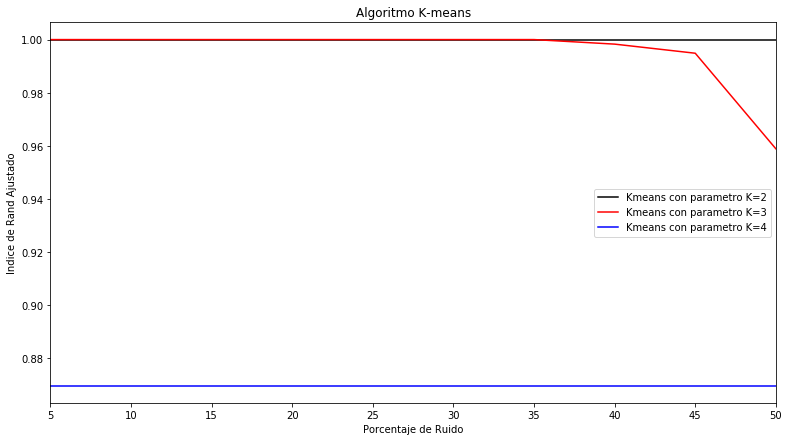

In [17]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasRandkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasRandkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

Informacion Mutua Ajustada

In [18]:
mediasIMkmeansK1 = IMkmeansclusteringK1.groupby([IMkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK1.index.names = ["PorcRuido"]
mediasIMkmeansK1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [19]:
mediasIMkmeansK2 = IMkmeansclusteringK2.groupby([IMkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK2.index.names = ["PorcRuido"]
mediasIMkmeansK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    1.000000
20.0    1.000000
25.0    1.000000
30.0    1.000000
35.0    1.000000
40.0    0.998318
45.0    0.994953
50.0    0.959624
Name: Resultado, dtype: float64

In [20]:
mediasIMkmeansK3 = IMkmeansclusteringK3.groupby([IMkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmeansK3.index.names = ["PorcRuido"]
mediasIMkmeansK3

PorcRuido
5.0     0.82615
10.0    0.82615
15.0    0.82615
20.0    0.82615
25.0    0.82615
30.0    0.82615
35.0    0.82615
40.0    0.82615
45.0    0.82615
50.0    0.82615
Name: Resultado, dtype: float64

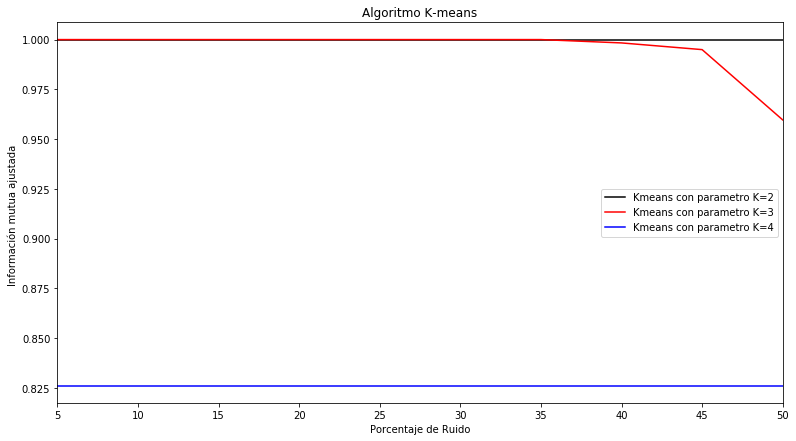

In [21]:
#K-means Informacion Mutua Ajustada
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasIMkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasIMkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [22]:
mediasFMkmeansK1 = FMkmeansclusteringK1.groupby([FMkmeansclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK1.index.names = ["PorcRuido"]
mediasFMkmeansK1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [23]:
mediasFMkmeansK2 = FMkmeansclusteringK2.groupby([FMkmeansclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK2.index.names = ["PorcRuido"]
mediasFMkmeansK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    1.000000
20.0    1.000000
25.0    1.000000
30.0    1.000000
35.0    1.000000
40.0    0.999098
45.0    0.997293
50.0    0.978346
Name: Resultado, dtype: float64

In [24]:
mediasFMkmeansK3 = FMkmeansclusteringK3.groupby([FMkmeansclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmeansK3.index.names = ["PorcRuido"]
mediasFMkmeansK3

PorcRuido
5.0     0.912926
10.0    0.912926
15.0    0.912926
20.0    0.912926
25.0    0.912926
30.0    0.912926
35.0    0.912926
40.0    0.912926
45.0    0.912926
50.0    0.912926
Name: Resultado, dtype: float64

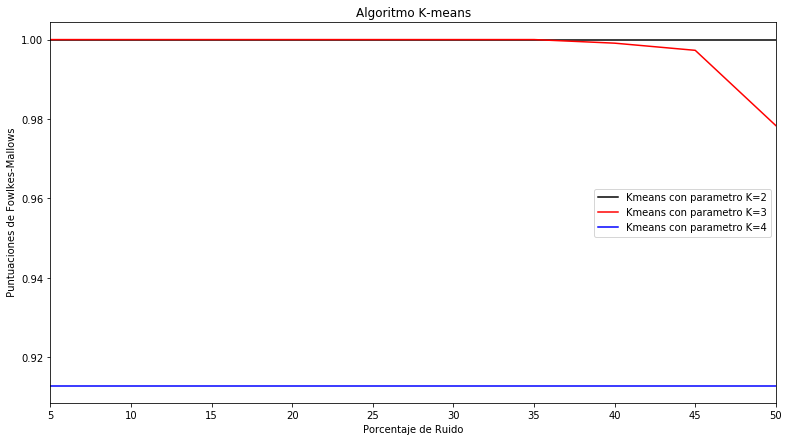

In [25]:
#K-means  Puntuaciones de Fowlkes-Mallows 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmeansK1.plot(color='black',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasFMkmeansK2.plot(color='red',label="Kmeans con parametro K=" + str(param_kmeans_nro2))
mediasFMkmeansK3.plot(color='blue',label="Kmeans con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo K-means')
plt.legend()
plt.show()

K-medoids

Índice de Rand ajustado

In [26]:
mediasRandkmedoidsK1 = RandkmedoidclusteringK1.groupby([RandkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK1.index.names = ["PorcRuido"]
mediasRandkmedoidsK1

PorcRuido
5.0     1.0
10.0    1.0
15.0    1.0
20.0    1.0
25.0    1.0
30.0    1.0
35.0    1.0
40.0    1.0
45.0    1.0
50.0    1.0
Name: Resultado, dtype: float64

In [27]:
mediasRandkmedoidsK2 = RandkmedoidclusteringK2.groupby([RandkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK2.index.names = ["PorcRuido"]
mediasRandkmedoidsK2

PorcRuido
5.0     1.000000
10.0    1.000000
15.0    1.000000
20.0    1.000000
25.0    1.000000
30.0    1.000000
35.0    1.000000
40.0    0.998287
45.0    0.994860
50.0    0.958881
Name: Resultado, dtype: float64

In [28]:
mediasRandkmedoidsK3 = RandkmedoidclusteringK3.groupby([RandkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandkmedoidsK3.index.names = ["PorcRuido"]
mediasRandkmedoidsK3

PorcRuido
5.0     0.86976
10.0    0.86976
15.0    0.86976
20.0    0.86976
25.0    0.86976
30.0    0.86976
35.0    0.86976
40.0    0.86976
45.0    0.86976
50.0    0.86976
Name: Resultado, dtype: float64

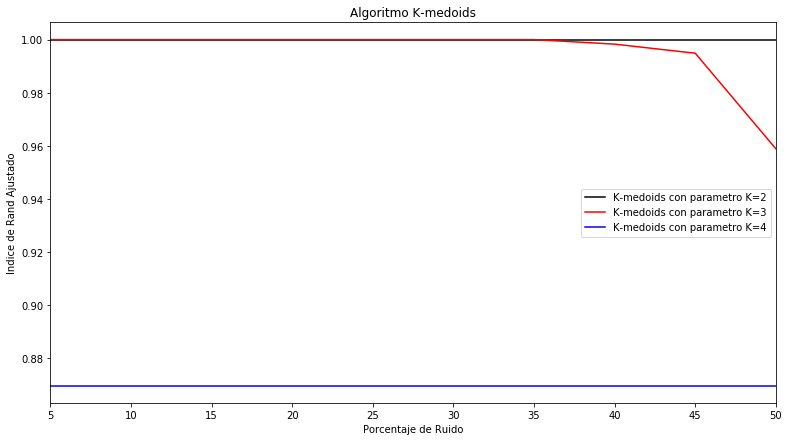

In [29]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasRandkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasRandkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

Información mutua ajustada 

In [30]:
mediasIMkmedoidsK1 = IMkmedoidclusteringK1.groupby([IMkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK1.index.names = ["PorcRuido"]
mediasIMkmedoidsK1

PorcRuido
5.0     1.000000
10.0    0.985188
15.0    0.976881
20.0    0.970012
25.0    0.952490
30.0    0.971811
35.0    0.970034
40.0    0.963301
45.0    0.952686
50.0    0.946433
Name: Resultado, dtype: float64

In [31]:
mediasIMkmedoidsK2 = IMkmedoidclusteringK2.groupby([IMkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK2.index.names = ["PorcRuido"]
mediasIMkmedoidsK2

PorcRuido
5.0     0.998318
10.0    0.989795
15.0    0.949368
20.0    0.937753
25.0    0.900198
30.0    0.853395
35.0    0.848877
40.0    0.838210
45.0    0.839691
50.0    0.791859
Name: Resultado, dtype: float64

In [32]:
mediasIMkmedoidsK3 = IMkmedoidclusteringK3.groupby([IMkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMkmedoidsK3.index.names = ["PorcRuido"]
mediasIMkmedoidsK3

PorcRuido
5.0     0.839294
10.0    0.837878
15.0    0.832572
20.0    0.824514
25.0    0.805632
30.0    0.799798
35.0    0.779659
40.0    0.786635
45.0    0.765097
50.0    0.748736
Name: Resultado, dtype: float64

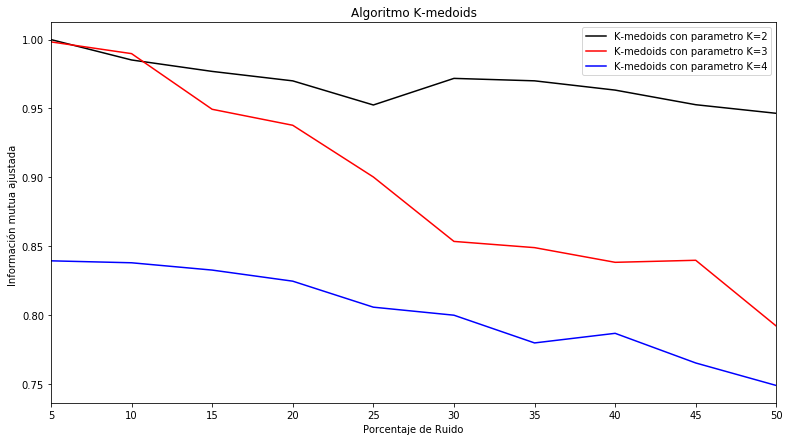

In [33]:
#K-means Coeficiente de Silueta
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasIMkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasIMkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [34]:
mediasFMkmedoidsK1 = FMkmedoidclusteringK1.groupby([FMkmedoidclusteringK1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK1.index.names = ["PorcRuido"]
mediasFMkmedoidsK1

PorcRuido
5.0     1.000000
10.0    0.991949
15.0    0.987241
20.0    0.983761
25.0    0.977066
30.0    0.985064
35.0    0.984643
40.0    0.982023
45.0    0.975448
50.0    0.972430
Name: Resultado, dtype: float64

In [35]:
mediasFMkmedoidsK2 = FMkmedoidclusteringK2.groupby([FMkmedoidclusteringK2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK2.index.names = ["PorcRuido"]
mediasFMkmedoidsK2

PorcRuido
5.0     0.999098
10.0    0.994323
15.0    0.972341
20.0    0.966611
25.0    0.946187
30.0    0.920607
35.0    0.918265
40.0    0.912980
45.0    0.913935
50.0    0.886948
Name: Resultado, dtype: float64

In [36]:
mediasFMkmedoidsK3 = FMkmedoidclusteringK3.groupby([FMkmedoidclusteringK3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMkmedoidsK3.index.names = ["PorcRuido"]
mediasFMkmedoidsK3

PorcRuido
5.0     0.907111
10.0    0.909105
15.0    0.907125
20.0    0.902839
25.0    0.895747
30.0    0.893114
35.0    0.882831
40.0    0.887331
45.0    0.875039
50.0    0.863995
Name: Resultado, dtype: float64

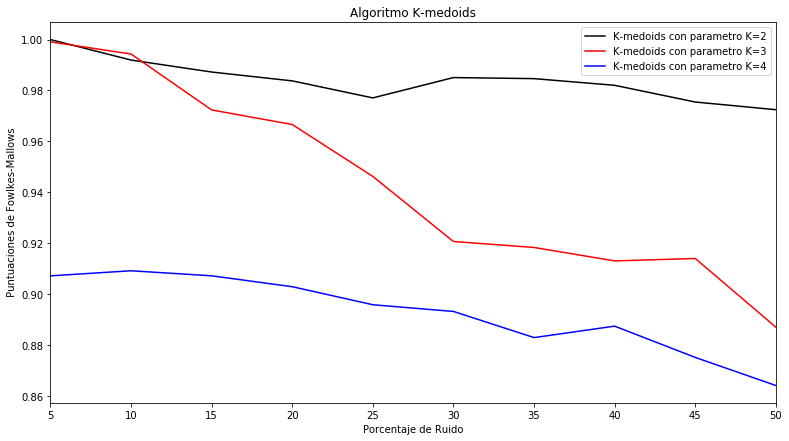

In [37]:
#K-medoids  Puntuaciones de Fowlkes-Mallows
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmedoidsK1.plot(color='black',label="K-medoids con parametro K=" + str(param_kmeans_nro1))
mediasFMkmedoidsK2.plot(color='red',label="K-medoids con parametro K=" + str(param_kmeans_nro2))
mediasFMkmedoidsK3.plot(color='blue',label="K-medoids con parametro K=" +  str(param_kmeans_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo K-medoids')
plt.legend()
plt.show()

DBSCAN

Índice de Rand ajustado

In [38]:
mediasRandDBSCAN1 = RandDbscanclustering1.groupby([RandDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN1.index.names = ["PorcRuido"]
mediasRandDBSCAN1

PorcRuido
5.0     0.999988
10.0    0.999969
15.0    0.999919
20.0    0.999913
25.0    0.999869
30.0    0.999838
35.0    0.999863
40.0    0.999807
45.0    0.999757
50.0    0.999813
Name: Resultado, dtype: float64

In [39]:
mediasRandDBSCAN2 = RandDbscanclustering2.groupby([RandDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN2.index.names = ["PorcRuido"]
mediasRandDBSCAN2

PorcRuido
5.0     1.000000
10.0    0.999994
15.0    0.999988
20.0    0.999988
25.0    0.999982
30.0    0.999951
35.0    0.999969
40.0    0.999945
45.0    0.999969
50.0    0.999969
Name: Resultado, dtype: float64

In [40]:
mediasRandDBSCAN3 = RandDbscanclustering3.groupby([RandDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasRandDBSCAN3.index.names = ["PorcRuido"]
mediasRandDBSCAN3

PorcRuido
5.0     0.999982
10.0    0.999982
15.0    0.999982
20.0    0.999988
25.0    0.999994
30.0    0.999958
35.0    0.999964
40.0    0.999933
45.0    0.999952
50.0    0.999915
Name: Resultado, dtype: float64

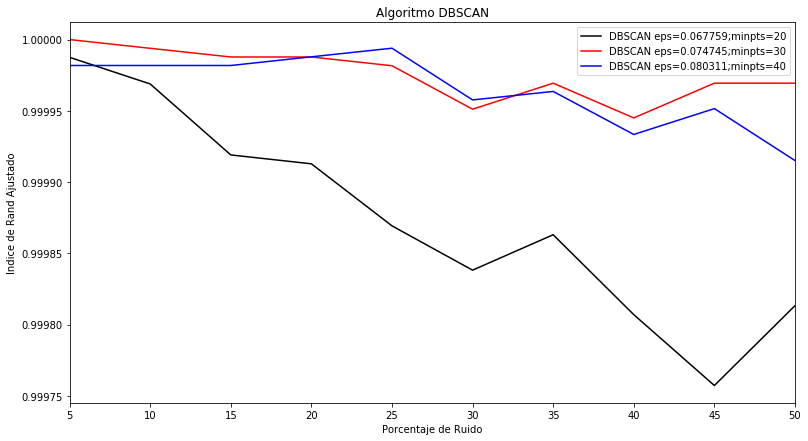

In [41]:
#K-means Indice de Rand Ajustado
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasRandDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasRandDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Indice de Rand Ajustado')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

Información mutua ajustada 

In [42]:
mediasIMDBSCAN1 = IMDbscanclustering1.groupby([IMDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN1.index.names = ["PorcRuido"]
mediasIMDBSCAN1

PorcRuido
5.0     0.999953
10.0    0.999882
15.0    0.999692
20.0    0.999669
25.0    0.999508
30.0    0.999390
35.0    0.999479
40.0    0.999267
45.0    0.999082
50.0    0.999295
Name: Resultado, dtype: float64

In [43]:
mediasIMDBSCAN2 = IMDbscanclustering2.groupby([IMDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN2.index.names = ["PorcRuido"]
mediasIMDBSCAN2

PorcRuido
5.0     1.000000
10.0    0.999976
15.0    0.999952
20.0    0.999952
25.0    0.999928
30.0    0.999807
35.0    0.999879
40.0    0.999783
45.0    0.999879
50.0    0.999879
Name: Resultado, dtype: float64

In [44]:
mediasIMDBSCAN3 = IMDbscanclustering3.groupby([IMDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasIMDBSCAN3.index.names = ["PorcRuido"]
mediasIMDBSCAN3

PorcRuido
5.0     0.999927
10.0    0.999927
15.0    0.999927
20.0    0.999951
25.0    0.999976
30.0    0.999830
35.0    0.999854
40.0    0.999733
45.0    0.999806
50.0    0.999660
Name: Resultado, dtype: float64

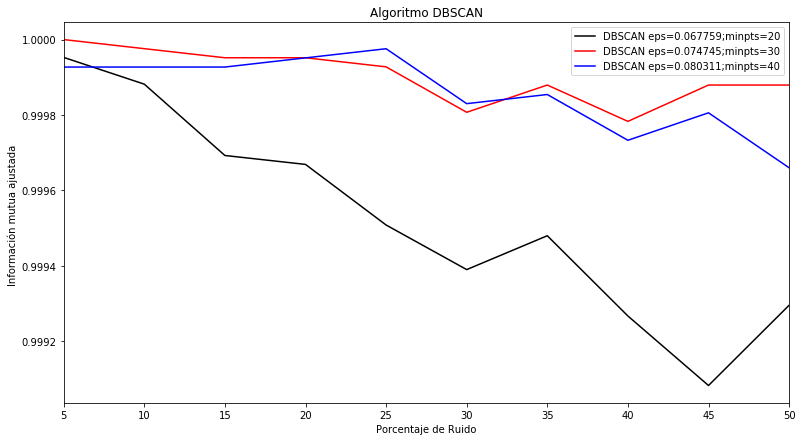

In [45]:
#DBSCAN Información mutua ajustada
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasIMDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasIMDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Información mutua ajustada ')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

 Puntuaciones de Fowlkes-Mallows

In [46]:
mediasFMDBSCAN1 = FMDbscanclustering1.groupby([FMDbscanclustering1['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN1.index.names = ["PorcRuido"]
mediasFMDBSCAN1

PorcRuido
5.0     0.999992
10.0    0.999979
15.0    0.999945
20.0    0.999941
25.0    0.999912
30.0    0.999891
35.0    0.999908
40.0    0.999870
45.0    0.999836
50.0    0.999874
Name: Resultado, dtype: float64

In [47]:
mediasFMDBSCAN2 = FMDbscanclustering2.groupby([FMDbscanclustering2['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN2.index.names = ["PorcRuido"]
mediasFMDBSCAN2

PorcRuido
5.0     1.000000
10.0    0.999996
15.0    0.999992
20.0    0.999992
25.0    0.999988
30.0    0.999967
35.0    0.999979
40.0    0.999963
45.0    0.999979
50.0    0.999979
Name: Resultado, dtype: float64

In [48]:
mediasFMDBSCAN3 = FMDbscanclustering3.groupby([FMDbscanclustering3['PorcRuido']
                              ])['Resultado'].mean()

mediasFMDBSCAN3.index.names = ["PorcRuido"]
mediasFMDBSCAN3

PorcRuido
5.0     0.999988
10.0    0.999988
15.0    0.999988
20.0    0.999992
25.0    0.999996
30.0    0.999972
35.0    0.999976
40.0    0.999955
45.0    0.999968
50.0    0.999943
Name: Resultado, dtype: float64

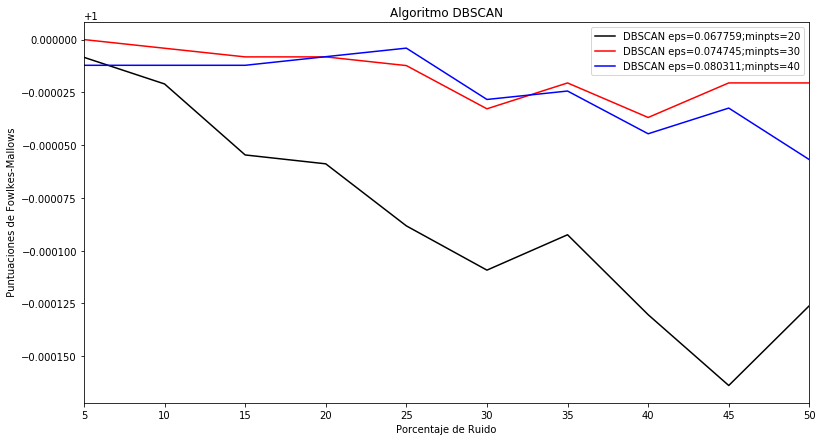

In [49]:
#BSCAN  Puntuaciones de Fowlkes-Mallows
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMDBSCAN1.plot(color='black',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
mediasFMDBSCAN2.plot(color='red',label="DBSCAN eps=" + str(param_eps_nro2) + ";minpts=" + str(param_minpts_nro2))
mediasFMDBSCAN3.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro3) + ";minpts=" + str(param_minpts_nro3))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel(' Puntuaciones de Fowlkes-Mallows')
plt.title('Algoritmo DBSCAN')
plt.legend()
plt.show()

# Resultados Agrupados por Métricas

Se tiene en cuenta los mejores resultados de cada algoritmo evaluado 

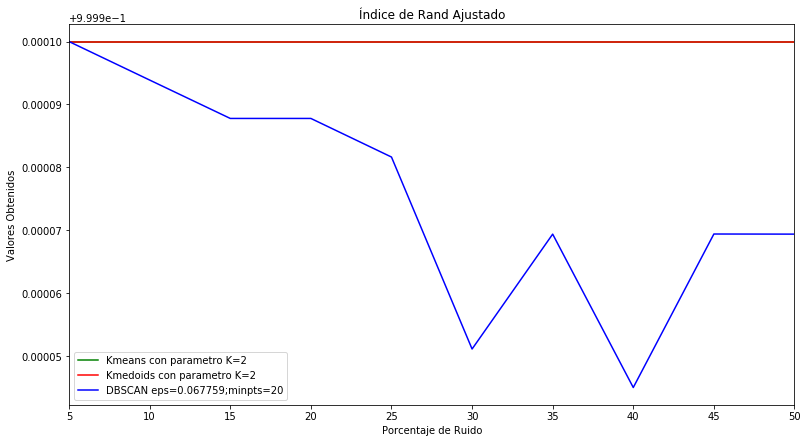

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasRandkmeansK1.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasRandkmedoidsK1.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro1))
mediasRandDBSCAN2.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Índice de Rand Ajustado')
plt.legend()
plt.show() 

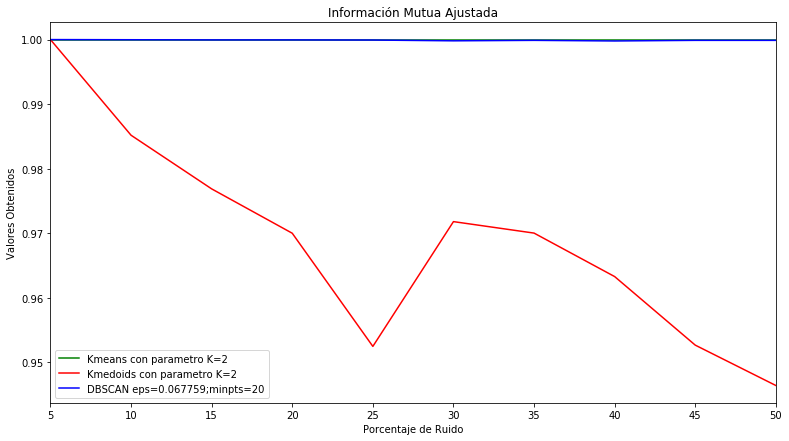

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasIMkmeansK1.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasIMkmedoidsK1.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro1))
mediasIMDBSCAN2.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Información Mutua Ajustada')
plt.legend()
plt.show() 

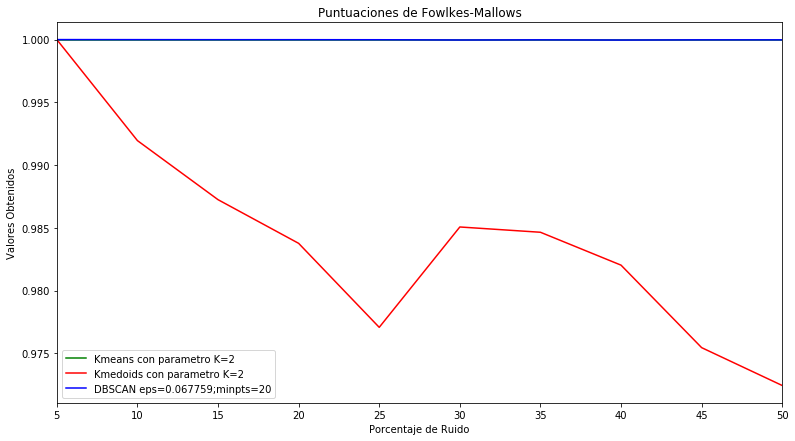

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 7))
mediasFMkmeansK1.plot(color='green',label="Kmeans con parametro K=" + str(param_kmeans_nro1))
mediasFMkmedoidsK1.plot(color='red',label="Kmedoids con parametro K=" + str(param_kmedoids_nro1))
mediasFMDBSCAN2.plot(color='blue',label="DBSCAN eps=" + str(param_eps_nro1) + ";minpts=" + str(param_minpts_nro1))
plt.xlabel('Porcentaje de Ruido')
plt.ylabel('Valores Obtenidos')
plt.title('Puntuaciones de Fowlkes-Mallows')
plt.legend()
plt.show() 